In [35]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
data = pd.read_csv('/Users/saina/Downloads//open_meteo.csv')
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d')
data.head()

,Unnamed: 0,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,0,2010-01-01,0.0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,...,0.0,18.3,25.6,54.0,4.38,24.900002,67.0,8.0,Pakistan,Karachi
1,1,2010-01-02,2.0,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,...,0.0,24.6,35.3,64.0,3.84,24.900002,67.0,8.0,Pakistan,Karachi
2,2,2010-01-03,0.0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,...,0.0,16.6,28.1,312.0,3.69,24.900002,67.0,8.0,Pakistan,Karachi
3,3,2010-01-04,0.0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,...,0.0,14.0,22.7,353.0,3.63,24.900002,67.0,8.0,Pakistan,Karachi
4,4,2010-01-05,0.0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,...,0.0,19.3,29.2,270.0,3.55,24.900002,67.0,8.0,Pakistan,Karachi


In [ ]:
data = data[['time', 'city', 'latitude', 'temperature_2m_min', 'temperature_2m_max', 'temperature_2m_mean', 'precipitation_sum', 'precipitation_hours', 'et0_fao_evapotranspiration']]
data['precipitation_rate'] = data['precipitation_sum'] / data['precipitation_hours']
data['precipitation_rate'].fillna(0, inplace=True)
data.head()

In [ ]:
for city, group_data in data.groupby('city'):
    plt.figure(figsize=(10, 6))
    plt.scatter(group_data['precipitation_sum'], group_data['temperature_2m_mean'], label=city)

    plt.title('Temperature vs precipitation_sum for %s' % city )
    plt.xlabel('Precipitation (mm/day)')
    plt.ylabel('temperature (mm/day)')
    plt.legend('Temperature vs precipitation')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

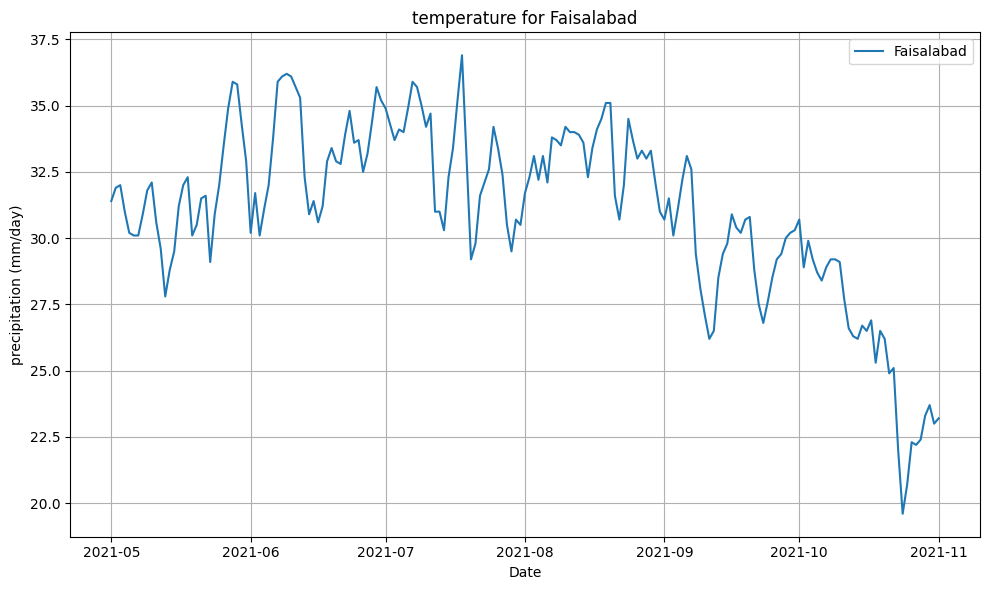

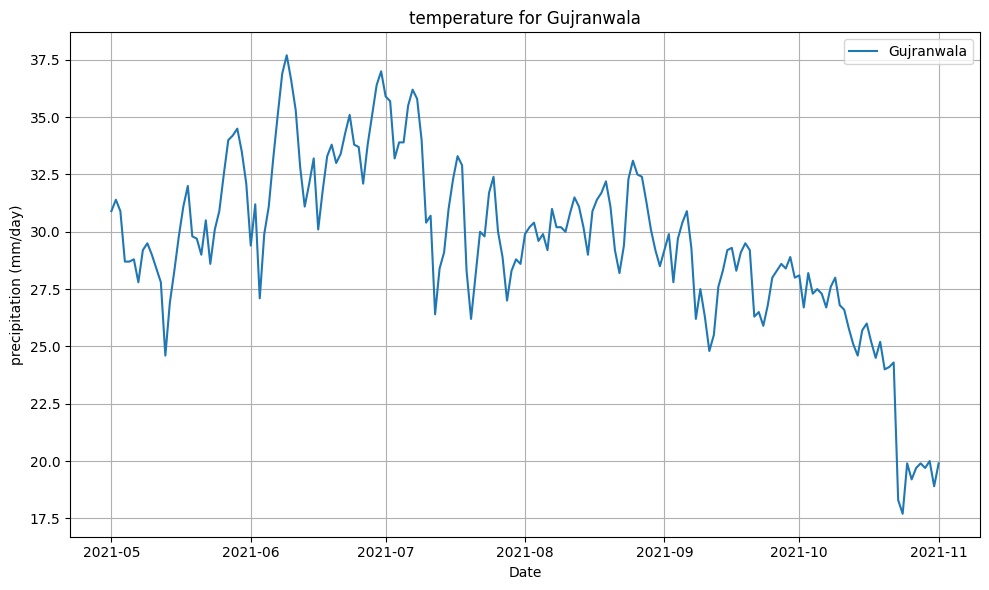

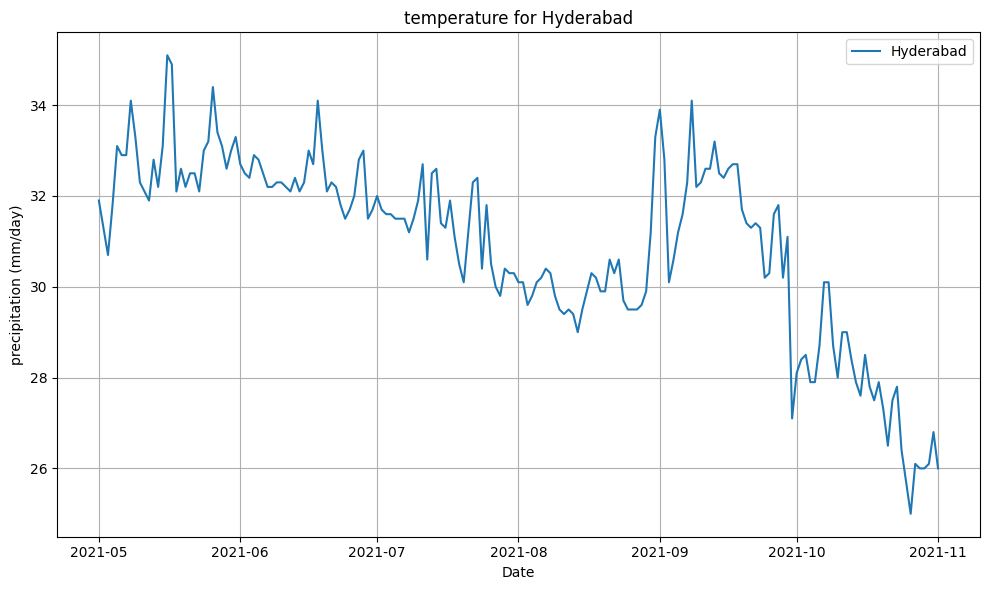

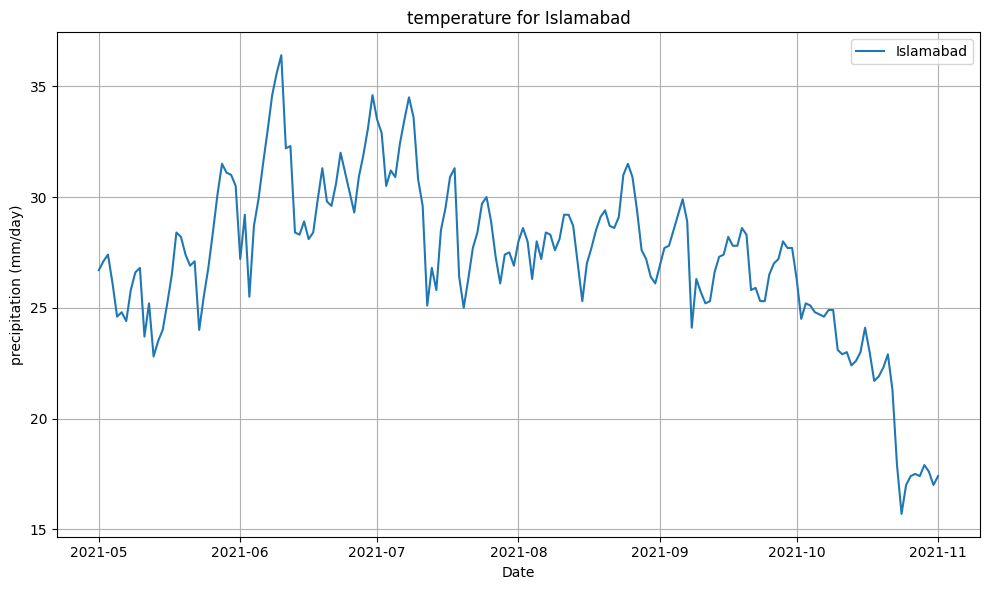

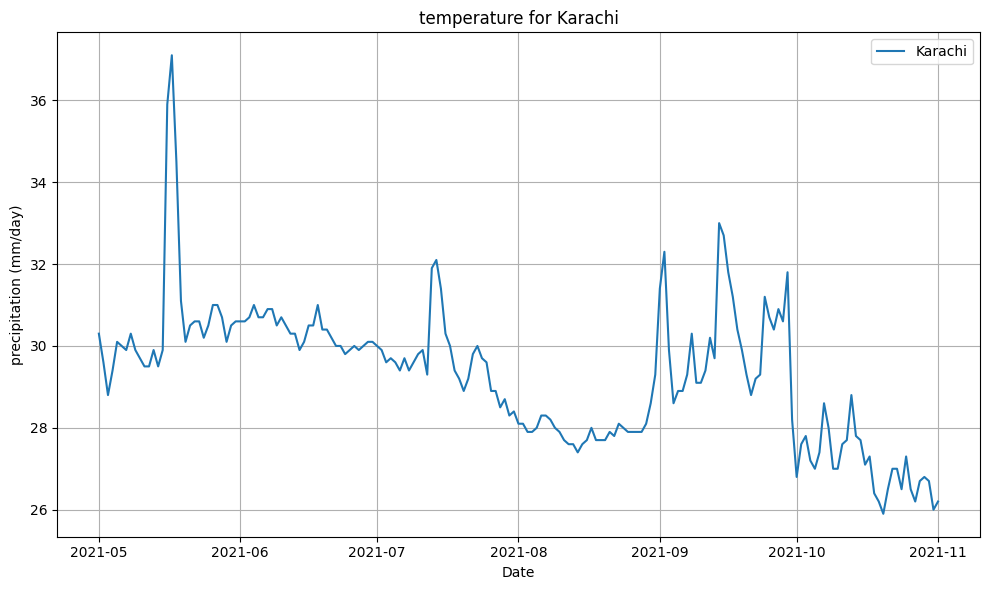

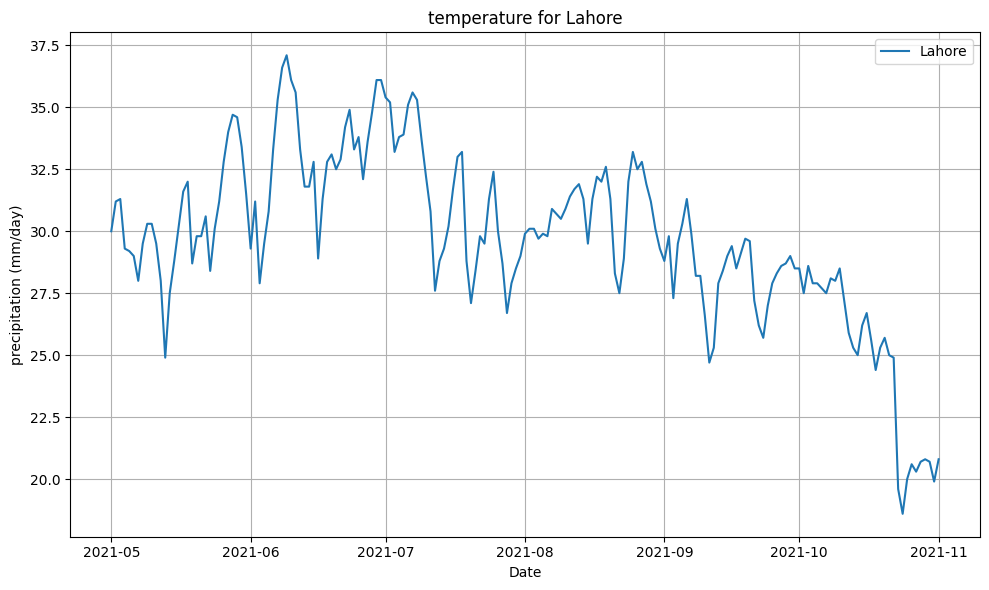

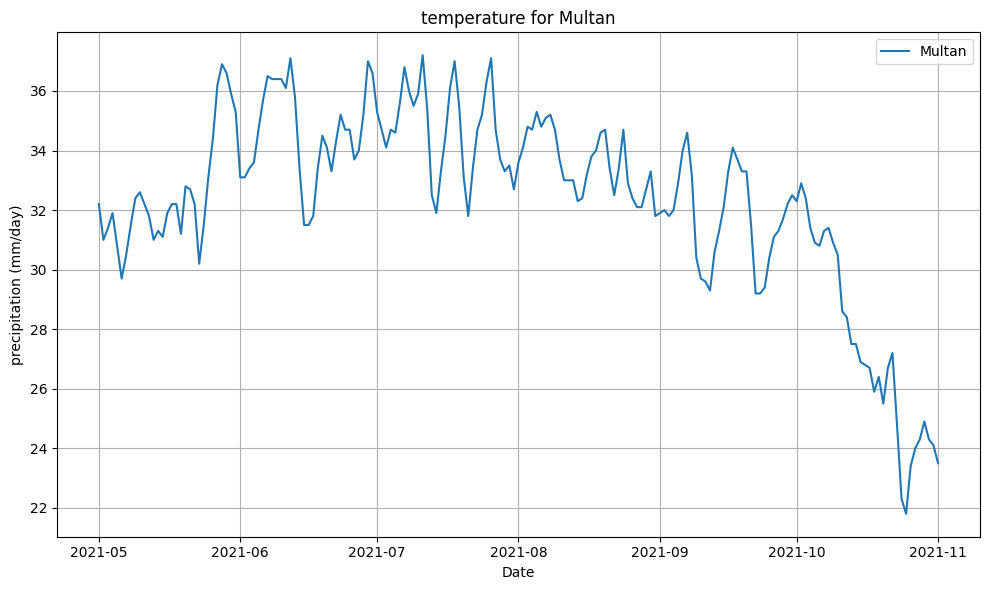

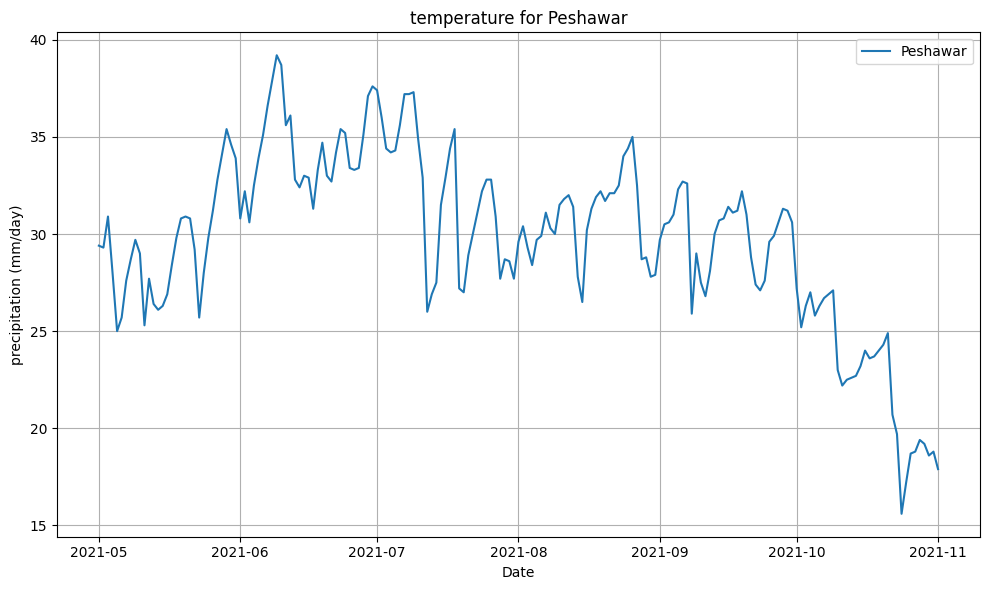

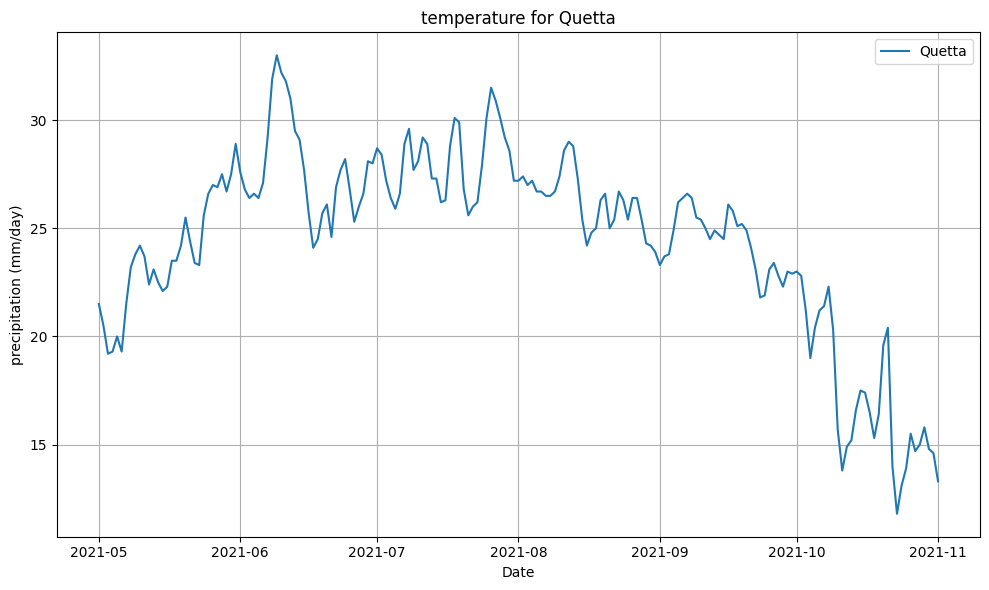

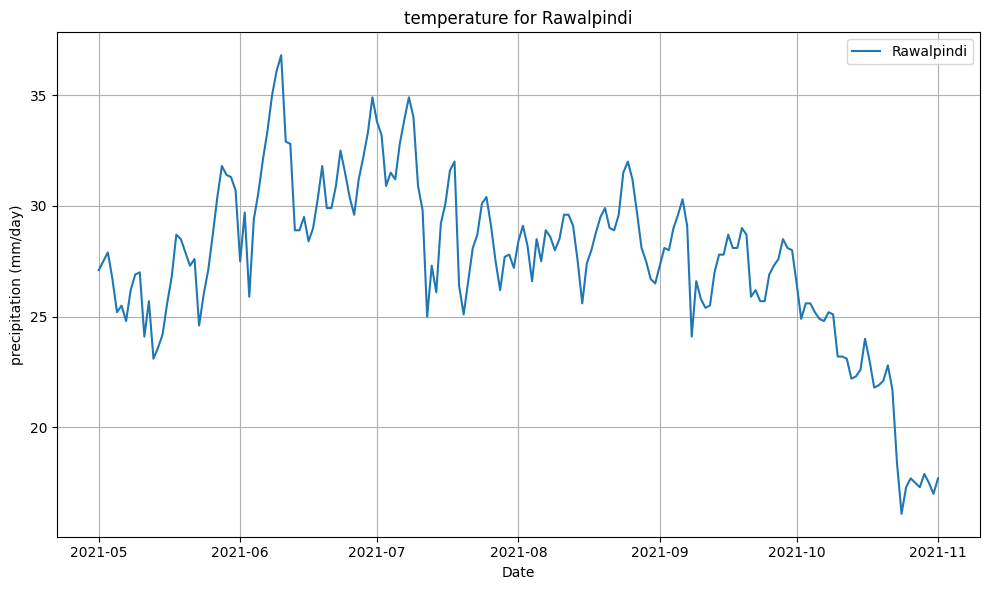

In [46]:
start_date = '2021-5-1'
end_date = '2021-11-1'
filtered_df = data[(data['time'] >= start_date) & (data['time'] <= end_date)]
for city, group_data in filtered_df.groupby('city'):
    plt.figure(figsize=(10, 6))
    plt.plot(group_data['time'], group_data['temperature_2m_mean'], label=city)
    plt.title('temperature for %s' % city)
    plt.xlabel('Date')
    plt.ylabel('precipitation (mm/day)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()